In [58]:
import pandas as pd
import matplotlib.pyplot as plt

## 🎧 Explorando dados do Spotify
Aqui, vamos explorar dados extraídos da conta de um usuário do Spotify para entender um pouco do seu perfil e gosto musical. Trabalharemos com dois datasets:
1. **playlists_tracks**: contém a listagem de todas as suas playlists públicas e as músicas contidas nelas
2. **genres_artists**: contém a listagem de artistas presentes nas playlists e seus gêneros

In [59]:
genres_artists = pd.read_csv('datasets/genres_artists.csv')
playlists_tracks = pd.read_csv('datasets/playlists_tracks.csv')

In [60]:
genres_artists.head()

,Unnamed: 0,artist_name,genres
0,0,Rage Against The Machine,"rap metal, rap rock, alternative metal, nu metal"
1,1,System Of A Down,"nu metal, metal, alternative metal, rap metal,..."
2,2,Metallica,"metal, thrash metal, rock, heavy metal, hard rock"
3,3,Dead Kennedys,"punk, hardcore punk, skate punk, proto-punk"
4,4,The Hives,garage rock


In [61]:
playlists_tracks.head()

,Unnamed: 0,playlist_id,playlist_name,track_id,track_name,artist_names,album_name,album_release_date,popularity,duration_ms
0,0,2VhIiQbHHMKRPEeCukaeZt,Climinha de presencial,59WN2psjkt1tyaxjspN8fp,Killing In The Name,Rage Against The Machine,Rage Against The Machine - XX (20th Anniversar...,1992,79,313573
1,1,2VhIiQbHHMKRPEeCukaeZt,Climinha de presencial,2DlHlPMa4M17kufBvI2lEN,Chop Suey!,System Of A Down,Toxicity,2001-09-04,85,210240
2,2,2VhIiQbHHMKRPEeCukaeZt,Climinha de presencial,3DwQ7AH3xGD9h65ezslm6q,Enter Sandman - Remastered 2021,Metallica,Metallica (Remastered Deluxe Box Set),2021-09-10,83,331560
3,3,2VhIiQbHHMKRPEeCukaeZt,Climinha de presencial,1VNWaY3uNfoeWqb5U8x2QX,Lonely Day,System Of A Down,Hypnotize,2005-11-22,82,167906
4,4,2VhIiQbHHMKRPEeCukaeZt,Climinha de presencial,6capuHDLxgoUUjDD0UhAgN,Holiday in Cambodia,Dead Kennedys,Give Me Convenience or Give Me Death,1987-06-15,53,224866


### Leitura e Visão Geral dos Dados ###

In [62]:
genres_artists.shape

(934, 3)

In [63]:
playlists_tracks.shape

(8661, 10)

In [64]:
genres_artists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 934 entries, 0 to 933
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   934 non-null    int64 
 1   artist_name  934 non-null    object
 2   genres       660 non-null    object
dtypes: int64(1), object(2)
memory usage: 22.0+ KB


In [65]:
playlists_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8661 entries, 0 to 8660
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          8661 non-null   int64 
 1   playlist_id         8661 non-null   object
 2   playlist_name       8661 non-null   object
 3   track_id            8661 non-null   object
 4   track_name          8659 non-null   object
 5   artist_names        8659 non-null   object
 6   album_name          8659 non-null   object
 7   album_release_date  8661 non-null   object
 8   popularity          8661 non-null   int64 
 9   duration_ms         8661 non-null   int64 
dtypes: int64(3), object(7)
memory usage: 676.8+ KB


In [66]:
#Quantidade de músicas por playlist
playlists_tracks['playlist_name'].value_counts()

playlist_name
Caminhando sem padrão nenhum                  311
Rockzim pra cantar junto                      300
cantando feat. rebolando                      274
tudo misturado curtindo uma chuva             261
Radio em '00                                  241
                                             ... 
indie mtv 6h em 2008                           18
Nunca canso de ouvir                           16
Instrumental                                   16
Músicas de ouvir 2x pra aproveitar direito     16
Euro trip #3                                    6
Name: count, Length: 89, dtype: int64

### Limpeza e transformações

Antes de analisarmos as playlists e os gêneros, vamos preparar nossos dados:
1. Extrair apenas o **ano** da data de lançamento dos álbuns  
2. Remover músicas com **nome ausente**  
3. Transformar a tabela de gêneros para que cada **gênero tenha uma linha própria**

In [67]:
# 1. Extrair o ano
playlists_tracks['album_released_date_ajusted'] = pd.to_datetime(
    playlists_tracks['album_release_date'], errors="coerce") 

In [68]:
playlists_tracks.columns

Index(['Unnamed: 0', 'playlist_id', 'playlist_name', 'track_id', 'track_name',
       'artist_names', 'album_name', 'album_release_date', 'popularity',
       'duration_ms', 'album_released_date_ajusted'],
      dtype='object')

In [69]:
playlists_tracks['album_released_year'] = playlists_tracks['album_released_date_ajusted'].dt.year 

In [70]:
playlists_tracks.columns

Index(['Unnamed: 0', 'playlist_id', 'playlist_name', 'track_id', 'track_name',
       'artist_names', 'album_name', 'album_release_date', 'popularity',
       'duration_ms', 'album_released_date_ajusted', 'album_released_year'],
      dtype='object')

In [71]:
playlists_tracks.head()

,Unnamed: 0,playlist_id,playlist_name,track_id,track_name,artist_names,album_name,album_release_date,popularity,duration_ms,album_released_date_ajusted,album_released_year
0,0,2VhIiQbHHMKRPEeCukaeZt,Climinha de presencial,59WN2psjkt1tyaxjspN8fp,Killing In The Name,Rage Against The Machine,Rage Against The Machine - XX (20th Anniversar...,1992,79,313573,1992-01-01,1992.0
1,1,2VhIiQbHHMKRPEeCukaeZt,Climinha de presencial,2DlHlPMa4M17kufBvI2lEN,Chop Suey!,System Of A Down,Toxicity,2001-09-04,85,210240,NaT,NaN
2,2,2VhIiQbHHMKRPEeCukaeZt,Climinha de presencial,3DwQ7AH3xGD9h65ezslm6q,Enter Sandman - Remastered 2021,Metallica,Metallica (Remastered Deluxe Box Set),2021-09-10,83,331560,NaT,NaN
3,3,2VhIiQbHHMKRPEeCukaeZt,Climinha de presencial,1VNWaY3uNfoeWqb5U8x2QX,Lonely Day,System Of A Down,Hypnotize,2005-11-22,82,167906,NaT,NaN
4,4,2VhIiQbHHMKRPEeCukaeZt,Climinha de presencial,6capuHDLxgoUUjDD0UhAgN,Holiday in Cambodia,Dead Kennedys,Give Me Convenience or Give Me Death,1987-06-15,53,224866,NaT,NaN


In [72]:
# 2. Excluir linhas com track_name ausente
playlists_tracks_clean = playlists_tracks.dropna(subset=['track_name'])
playlists_tracks_clean.shape

(8659, 12)

In [73]:
# 3. Explodir os gêneros (1 linha por artista e gênero)


### Visualização com Matplotlib ###

#### Quais playlists têm mais músicas? ####

In [74]:
playlist_counts = playlists_tracks_clean['playlist_name'].value_counts().head(10)
playlist_counts # as 10 playlists com mais músicas

playlist_name
Caminhando sem padrão nenhum         311
Rockzim pra cantar junto             300
cantando feat. rebolando             274
tudo misturado curtindo uma chuva    261
Radio em '00                         241
VOLTA JUVENTUDE                      239
Black power                          231
jovem indie                          219
Top indie                            215
Só ~good vibe~                       210
Name: count, dtype: int64

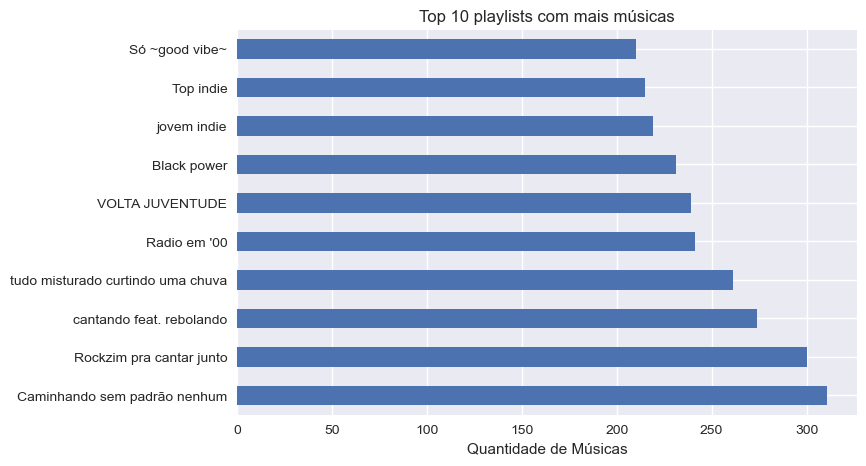

In [75]:
playlist_counts.plot(kind="barh", figsize=(8,5))

plt.title("Top 10 playlists com mais músicas")
plt.xlabel("Quantidade de Músicas")
plt.ylabel("") #tira o nome do eixo y

plt.show()

#### Como evolui a quantidade de músicas lançadas por ano nas playlists? ####

In [76]:
plt.style.use("seaborn-v0_8")

In [77]:
playlists_tracks_clean.columns

Index(['Unnamed: 0', 'playlist_id', 'playlist_name', 'track_id', 'track_name',
       'artist_names', 'album_name', 'album_release_date', 'popularity',
       'duration_ms', 'album_released_date_ajusted', 'album_released_year'],
      dtype='object')

In [78]:
songs_per_year = (
    playlists_tracks_clean['album_released_year']
    .value_counts()
    .sort_index()
)

songs_per_year.head()

album_released_year
1958.0    1
1960.0    4
1964.0    3
1966.0    1
1967.0    7
Name: count, dtype: int64

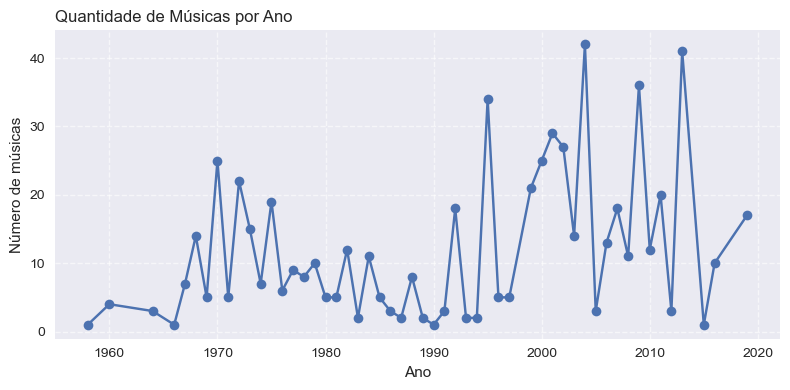

In [79]:
songs_per_year.plot(kind='line', marker="o", figsize=(8,4))
plt.title("Quantidade de Músicas por Ano", loc='left')
plt.xlabel("Ano")
plt.ylabel("Número de músicas")
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

plt.show()

#### Quais são os artistas com maior popularidade média? ####

In [80]:
artists_popularity = playlists_tracks_clean[['artist_names', 'popularity']]
artists_popularity.head()

,artist_names,popularity
0,Rage Against The Machine,79
1,System Of A Down,85
2,Metallica,83
3,System Of A Down,82
4,Dead Kennedys,53


In [81]:
artists_popularity_mean = artists_popularity.groupby(['artist_names'])['popularity'].mean()
artists_popularity_mean

artist_names
*NSYNC             64.125000
107 Faunos          1.000000
1915               39.000000
3OH!3              71.000000
3OH!3, Kesha       61.000000
                     ...    
sombr              88.000000
t.A.T.u.           79.000000
É O Tchan          36.000000
Édith Piaf         57.333333
Σtella, Redinho    70.000000
Name: popularity, Length: 1418, dtype: float64

In [82]:
#Ordenar os resultados para ver o topo da lista
top_artists_by_popularity = artists_popularity_mean.sort_values(ascending=False)
top_artists_by_popularity.head(10)

artist_names
The Neighbourhood                 91.000000
Gorillaz, De La Soul              90.000000
Tyler, The Creator, Kali Uchis    89.000000
Fleetwood Mac                     89.000000
The Weeknd, Daft Punk             89.000000
Kendrick Lamar, SZA               89.000000
Bad Bunny                         88.333333
sombr                             88.000000
DJ Snake, Justin Bieber           86.000000
The Chainsmokers, Halsey          86.000000
Name: popularity, dtype: float64

In [83]:
media_geral_artists_popularity = artists_popularity['popularity'].mean()
media_geral_artists_popularity

np.float64(41.17461600646726)

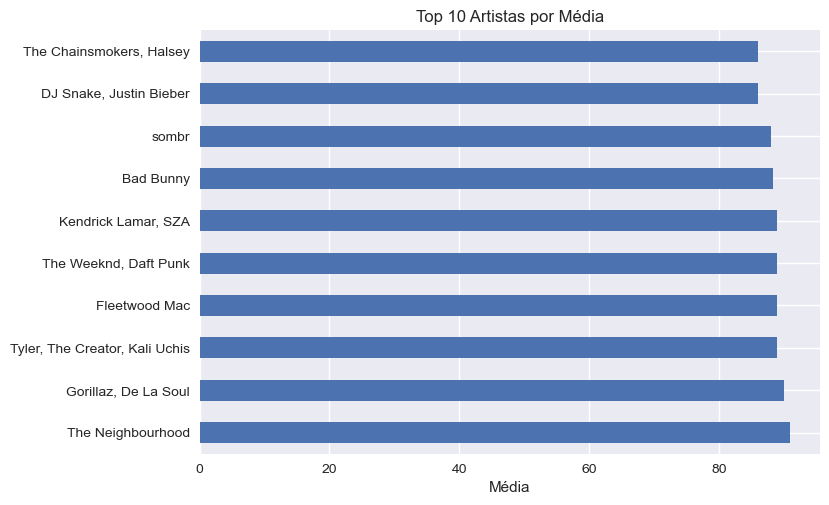

In [84]:
top_10_artists = top_artists_by_popularity.head(10)
top_10_artists.plot(kind='barh')
plt.xlabel('Média')
plt.ylabel('')
plt.title('Top 10 Artistas por Média')
plt.show()

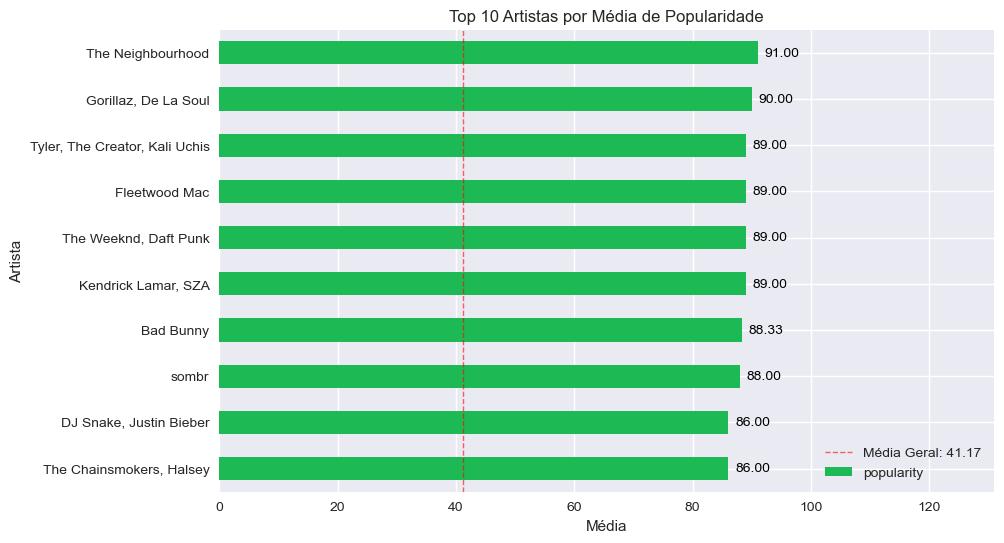

In [85]:
fig, ax = plt.subplots(figsize=(10, 6))

#Barras
bar_container = top_10_artists.plot(
    kind='barh', 
    ax=ax, 
    color='#1DB954' # Cor Spotify verde
)

# Rótulos e Título
plt.xlabel('Média')
plt.ylabel('Artista')
plt.title('Top 10 Artistas por Média de Popularidade')

#Adicionando linha de Comporação
ax.axvline(media_geral_artists_popularity, 
           color='r', 
           linestyle='--',
            alpha=0.6, #transparência
            linewidth=1, #espessura
          label=f'Média Geral: {media_geral_artists_popularity:.2f}')

#Adicionar os valores nas barras
ax.bar_label(bar_container.containers[0], #onde aplicar os rótulos
             fmt='%.2f', #formato:duas casas decimais
             padding=5, #distância da barra para o texto
             color='black', 
             fontsize=10)

# Ajustar limite X para garantir que os rótulos de dados caibam
ax.set_xlim(right=top_10_artists.max() + 40) 
ax.invert_yaxis() # Reverte a ordem para que o artista mais popular fique no topo

#Legenda
ax.legend(loc='lower right')

#Mostrar Gráfico
plt.show()

#### Quais são os artistas mais frequentes nas playlists? ####

In [86]:
 playlists_tracks_clean['artist_names'].value_counts().head()

artist_names
Oasis             160
Olivia Dean       159
Jungle            143
Arctic Monkeys    138
Beyoncé           131
Name: count, dtype: int64

#### Quais gêneros são mais frequentes entre os artistas das playlists? ####

In [87]:
genres_artists.head()

,Unnamed: 0,artist_name,genres
0,0,Rage Against The Machine,"rap metal, rap rock, alternative metal, nu metal"
1,1,System Of A Down,"nu metal, metal, alternative metal, rap metal,..."
2,2,Metallica,"metal, thrash metal, rock, heavy metal, hard rock"
3,3,Dead Kennedys,"punk, hardcore punk, skate punk, proto-punk"
4,4,The Hives,garage rock


In [88]:
#1. Transformar os gêneros em lista
genres_artists_exploded = genres_artists
genres_artists_exploded.drop(columns=['Unnamed: 0'], inplace=True)
genres_artists_exploded['genre_list'] = genres_artists_exploded['genres'].str.split(', ')
genres_artists_exploded.head()

,artist_name,genres,genre_list
0,Rage Against The Machine,"rap metal, rap rock, alternative metal, nu metal","[rap metal, rap rock, alternative metal, nu me..."
1,System Of A Down,"nu metal, metal, alternative metal, rap metal,...","[nu metal, metal, alternative metal, rap metal..."
2,Metallica,"metal, thrash metal, rock, heavy metal, hard rock","[metal, thrash metal, rock, heavy metal, hard ..."
3,Dead Kennedys,"punk, hardcore punk, skate punk, proto-punk","[punk, hardcore punk, skate punk, proto-punk]"
4,The Hives,garage rock,[garage rock]


In [89]:
#2. Separar(explodir) os gêneros; cada gênero em uma linha
# explode: Transform each element of a list-like to a row, replicating index values.
genres_artists_exploded=genres_artists_exploded.explode('genre_list')
genres_artists_exploded.head(10)

,artist_name,genres,genre_list
0,Rage Against The Machine,"rap metal, rap rock, alternative metal, nu metal",rap metal
0,Rage Against The Machine,"rap metal, rap rock, alternative metal, nu metal",rap rock
0,Rage Against The Machine,"rap metal, rap rock, alternative metal, nu metal",alternative metal
0,Rage Against The Machine,"rap metal, rap rock, alternative metal, nu metal",nu metal
1,System Of A Down,"nu metal, metal, alternative metal, rap metal,...",nu metal
1,System Of A Down,"nu metal, metal, alternative metal, rap metal,...",metal
1,System Of A Down,"nu metal, metal, alternative metal, rap metal,...",alternative metal
1,System Of A Down,"nu metal, metal, alternative metal, rap metal,...",rap metal
1,System Of A Down,"nu metal, metal, alternative metal, rap metal,...",rock
2,Metallica,"metal, thrash metal, rock, heavy metal, hard rock",metal


In [92]:
# 3. Limpar Espaços (Trim) e Converter para Minúsculas
genres_artists_exploded['genre_list'] = genres_artists_exploded['genre_list'].str.strip().str.lower()

In [94]:
# 4. Frequência de cada gênero
genres_artists_exploded['genre_list'].value_counts()

genre_list
mpb                   111
nova mpb               80
samba                  67
brazilian rock         51
brazilian pop          43
                     ... 
doom metal              1
portuguese hip hop      1
west coast hip hop      1
progressive rock        1
traditional music       1
Name: count, Length: 224, dtype: int64

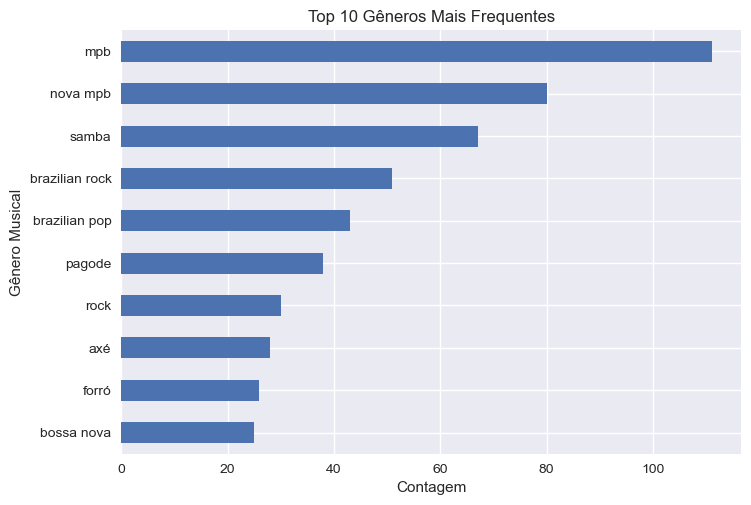

In [116]:
top_10_genres = genres_artists_exploded['genre_list'].value_counts().head(10).sort_values(ascending=True)
top_10_genres.plot(kind='barh')

plt.title('Top 10 Gêneros Mais Frequentes')
plt.xlabel('Contagem', fontsize=11)
plt.ylabel('Gênero Musical', fontsize=11)

plt.show()

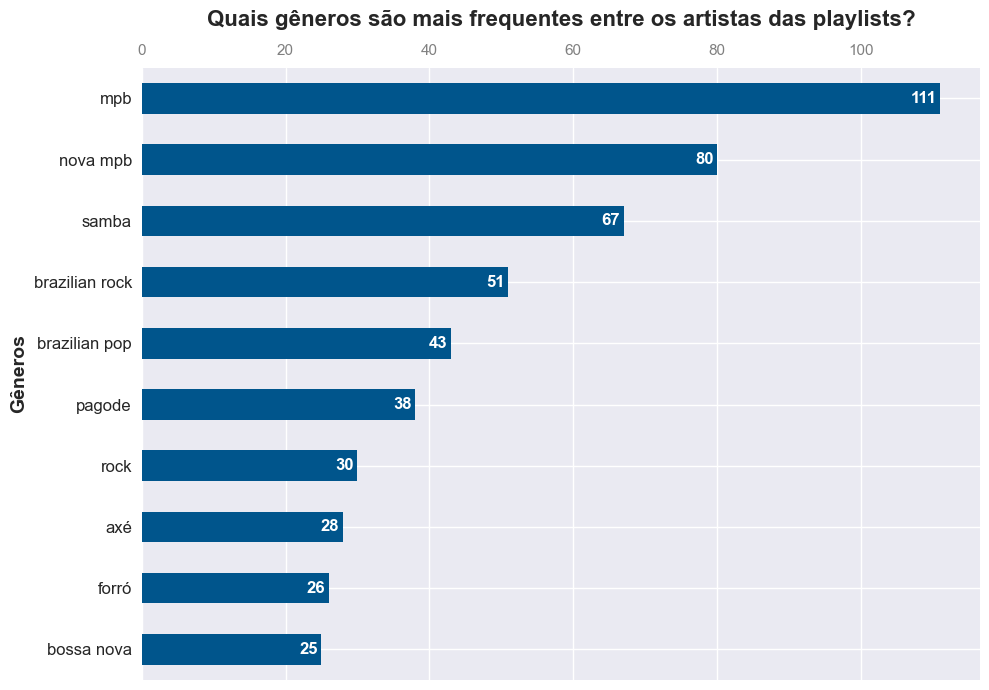

In [152]:
fig, ax = plt.subplots(figsize=(10, 7))

BLUE_COLOR = '#00558C'

bar_container = top_10_genres.plot(
    kind='barh',
    ax=ax,
    color=BLUE_COLOR
)

plt.xlabel('')
plt.ylabel('Gêneros', fontsize=14, fontweight='bold')
plt.title(
    'Quais gêneros são mais frequentes entre os artistas das playlists?', 
    fontsize=16, 
    loc='center', 
    pad=30, 
    fontweight='bold'
)

### Rótulos - EIXO X ###

#i: O índice da barra atual (de 0 a 9).
#count: O valor da barra atual (a frequência do gênero). Isso define o comprimento da barra (posição horizontal x).

for i, count in enumerate(top_10_genres.values): #(count, i) = (x, y)
    # Se a barra for grande, coloque o texto perto da ponta
    if count > top_10_genres.max() * 0.1: # verifica se é maior do que 10% da barra mais longo
        ax.text(count - 0.5, # Posição X do rótulo
                i, # Posição Y
                str(count), # Conteúdo a ser exibido
                color='white', 
                va='center', #alinhamento vertical
                ha='right', #alinhamento horizontal
                fontsize=12, 
                fontweight='bold')
    else: # Se a barra for pequena, coloque o texto fora
        ax.text(count + 20, 
                i, 
                str(count), 
                color=BLUE_COLOR, 
                va='center', 
                ha='left', 
                fontsize=12, 
                fontweight='bold')

### Labels ###
ax.xaxis.tick_top() # Move os ticks(labels) do eixo X para o topo
plt.yticks(fontsize=12)
plt.xticks(fontsize=11, color='gray')

### Exibir Gráfico ###
plt.tight_layout()
plt.show()

#### Qual é a duração média das músicas por playlist? ####

#### Exercício: Existe relação entre o ano de lançamento e a duração média das músicas? ####

#### Exercício: Quão diversa em gêneros é cada playlist? ####
Em outras palavras, quais playlists têm mais gêneros distintos entre os artistas que aparecem nelas?